In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.impute import SimpleImputer

import dabl

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

# Step 1 : Load Data into dataset

In [2]:
df = pd.read_csv("D:/Revi/Programs/Conda/TMLC/Projects/RTA Dataset.csv")

# Step 2 : Exploratory Data Analysis

### Step 2a : Let's check how many rows and columns does this dataframe have

As per the output the data has 12316 rows and 32 columns. One of these columns in the target.
Target : The column that needs to be predicted. In this dataset we want to predict the severity of the accident. Therefore the column Accident_severity is the target column.

In [3]:
df.shape

(12316, 32)

### Step 2b : Let's understand the data type of the columns. 

In [4]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

Here we have many Categorical (Object) data types including the target (Accident_severity).

### Step 2c : Let's review the data to understand more.

* What values are in the columns?
* Are there missing values?
* What are the possible list of values in each column?

In [5]:
df.sample(5)

Time Day_of_week Age_band_of_driver Sex_of_driver  \
7603  15:30:00      Monday           Under 18          Male   
3299   7:10:00      Friday            Unknown          Male   
3746  12:40:00    Saturday            Over 51          Male   
8719  17:40:00    Saturday              18-30          Male   
4955  11:27:00    Thursday            Over 51          Male   

       Educational_level Vehicle_driver_relation Driving_experience  \
7603  Junior high school                Employee             5-10yr   
3299  Junior high school                Employee         Above 10yr   
3746   Elementary school                Employee              2-5yr   
8719  Junior high school                Employee              2-5yr   
4955  Junior high school                   Owner              2-5yr   

      Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  ...  \
7603       Motorcycle            Owner                     NaN  ...   
3299              NaN            Owner                  2-5yrs  ...   
3746       Automobile            Owner                     NaN  ...   
8719       Automobile            Owner                 Unknown  ...   
4955  Special vehicle              NaN                     NaN  ...   

     Vehicle_movement   Casualty_class Sex_of_casualty Age_band_of_casualty  \
7603              NaN  Driver or rider            Male                18-30   
3299   Going straight       Pedestrian          Female                18-30   
3746   Going straight  Driver or rider            Male             Under 18   
8719   Going straight       Pedestrian          Female                18-30   
4955   Going straight  Driver or rider            Male                31-50   

     Casualty_severity Work_of_casuality Fitness_of_casuality  \
7603                 3            Driver               Normal   
3299                 3            Driver               Normal   
3746                 3             Other               Normal   
8719                 3            Driver               Normal   
4955                 3               NaN                  NaN   

                                    Pedestrian_movement  \
7603                                   Not a Pedestrian   
3299  Crossing from nearside - masked by parked or s...   
3746                                   Not a Pedestrian   
8719                                   Unknown or other   
4955                                   Not a Pedestrian   

               Cause_of_accident Accident_severity  
7603          Driving carelessly    Serious Injury  
3299               No distancing     Slight Injury  
3746                   Overspeed    Serious Injury  
8719  Changing lane to the right    Serious Injury  
4955                       Other     Slight Injury  

[5 rows x 32 columns]

Some observations are as follows

* Day_of_week has possible 7 values (Monday to Sunday)
* Sex_of_driver is either Male or Female
* Educational level is Elementary, Junior, High or Above high school
* Service Year information is missing for most of the rows.
* Casualty related fields are also missing information in some of the rows.


Let's review the missing values in detail

In [6]:
df.isnull()

Time  Day_of_week  Age_band_of_driver  Sex_of_driver  \
0      False        False               False          False   
1      False        False               False          False   
2      False        False               False          False   
3      False        False               False          False   
4      False        False               False          False   
...      ...          ...                 ...            ...   
12311  False        False               False          False   
12312  False        False               False          False   
12313  False        False               False          False   
12314  False        False               False          False   
12315  False        False               False          False   

       Educational_level  Vehicle_driver_relation  Driving_experience  \
0                  False                    False               False   
1                  False                    False               False   
2                  False                    False               False   
3                  False                    False               False   
4                  False                    False               False   
...                  ...                      ...                 ...   
12311               True                    False               False   
12312              False                    False               False   
12313              False                    False               False   
12314              False                    False               False   
12315              False                    False               False   

       Type_of_vehicle  Owner_of_vehicle  Service_year_of_vehicle  ...  \
0                False             False                    False  ...   
1                False             False                    False  ...   
2                False             False                     True  ...   
3                False             False                     True  ...   
4                 True             False                    False  ...   
...                ...               ...                      ...  ...   
12311            False             False                     True  ...   
12312            False             False                     True  ...   
12313            False             False                    False  ...   
12314            False             False                    False  ...   
12315            False             False                    False  ...   

       Vehicle_movement  Casualty_class  Sex_of_casualty  \
0                 False           False            False   
1                 False           False            False   
2                 False           False            False   
3                 False           False            False   
4                 False           False            False   
...                 ...             ...              ...   
12311             False           False            False   
12312             False           False            False   
12313             False           False            False   
12314             False           False            False   
12315             False           False            False   

       Age_band_of_casualty  Casualty_severity  Work_of_casuality  \
0                     False              False               True   
1                     False              False               True   
2                     False              False              False   
3                     False              False              False   
4                     False              False               True   
...                     ...                ...                ...   
12311                 False              False              False   
12312                 False              False              False   
12313                 False              False              False   
12314                 False              False              Fa

In [7]:
df.isnull().any()

Time                           False
Day_of_week                    False
Age_band_of_driver             False
Sex_of_driver                  False
Educational_level               True
Vehicle_driver_relation         True
Driving_experience              True
Type_of_vehicle                 True
Owner_of_vehicle                True
Service_year_of_vehicle         True
Defect_of_vehicle               True
Area_accident_occured           True
Lanes_or_Medians                True
Road_allignment                 True
Types_of_Junction               True
Road_surface_type               True
Road_surface_conditions        False
Light_conditions               False
Weather_conditions             False
Type_of_collision               True
Number_of_vehicles_involved    False
Number_of_casualties           False
Vehicle_movement                True
Casualty_class                 False
Sex_of_casualty                False
Age_band_of_casualty           False
Casualty_severity              False
W

In [8]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

Most of the columns have missing values. Some of the columns have missing values as high as 30%

Next question to ask is does our data have duplicate values

In [9]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12311    False
12312    False
12313    False
12314    False
12315    False
Length: 12316, dtype: bool

This seems to be cleaned dataset as we could not see any duplicate rows.

In [10]:
df.duplicated().sum()

0

### Step 2c : Statistical Analysis

In [11]:
df.describe()

Number_of_vehicles_involved  Number_of_casualties
count                 12316.000000          12316.000000
mean                      2.040679              1.548149
std                       0.688790              1.007179
min                       1.000000              1.000000
25%                       2.000000              1.000000
50%                       2.000000              1.000000
75%                       2.000000              2.000000
max                       7.000000              8.000000

In [12]:
df.describe(include="all")

Time Day_of_week Age_band_of_driver Sex_of_driver  \
count      12316       12316              12316         12316   
unique      1074           7                  5             3   
top     15:30:00      Friday              18-30          Male   
freq         120        2041               4271         11437   
mean         NaN         NaN                NaN           NaN   
std          NaN         NaN                NaN           NaN   
min          NaN         NaN                NaN           NaN   
25%          NaN         NaN                NaN           NaN   
50%          NaN         NaN                NaN           NaN   
75%          NaN         NaN                NaN           NaN   
max          NaN         NaN                NaN           NaN   

         Educational_level Vehicle_driver_relation Driving_experience  \
count                11575                   11737              11487   
unique                   7                       4                  7   
top     Junior high school                Employee             5-10yr   
freq                  7619                    9627               3363   
mean                   NaN                     NaN                NaN   
std                    NaN                     NaN                NaN   
min                    NaN                     NaN                NaN   
25%                    NaN                     NaN                NaN   
50%                    NaN                     NaN                NaN   
75%                    NaN                     NaN                NaN   
max                    NaN                     NaN                NaN   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  ...  \
count            11366            11834                    8388  ...   
unique              17                4                       6  ...   
top         Automobile            Owner                 Unknown  ...   
freq              3205            10459                    2883  ...   
mean               NaN              NaN                     NaN  ...   
std                NaN              NaN                     NaN  ...   
min                NaN              NaN                     NaN  ...   
25%                NaN              NaN                     NaN  ...   
50%                NaN              NaN                     NaN  ...   
75%                NaN              NaN                     NaN  ...   
max                NaN              NaN                     NaN  ...   

       Vehicle_movement   Casualty_class Sex_of_casualty Age_band_of_casualty  \
count             12008            12316           12316                12316   
unique               13                4               3                    6   
top      Going straight  Driver or rider            Male                   na   
freq               8158             4944            5253                 4443   
mean                NaN              NaN             NaN                  NaN   
std                 NaN              NaN             NaN                  NaN   
min                 NaN              NaN             NaN                  NaN   
25%                 NaN              NaN             NaN                  NaN   
50%                 NaN              NaN             NaN                  NaN   
75%                 NaN              NaN             NaN                  NaN   
max                 NaN              NaN             NaN                  NaN   

       Casualty_severity Work_of_casuality Fitness_of_casuality  \
count              12316              9118                 9681   
unique                 4                 7                    5   
top                    3            Driver               Normal   
freq                7076              5903                 9608   
mean                 NaN               NaN                  NaN   
std                  NaN               NaN                  NaN   
min                  NaN               NaN     

In this step the statistical parameters against each of the columns are analyzed. For example the values of mean, median and mode are looked at to see how skewed the data is. It also provides a view of range of values in a column, unique values and most frequently occuring values.

#### Exploring the data using visualizations

Each of the columns are called "Features". The objective of this visualization is to explore the distribution or the composition of each of the features visually.

First let's convert the time column from string to datetime data so that the components of time field can be extracted separately. This is useful to analyze the data from time perspective.

In [13]:
# Converting time to DateTime
df["Time"] = pd.to_datetime(df["Time"])

In [14]:
# Extracting hour and minute from timestamp
df["Hour"] = df["Time"].dt.hour
df["Minute"] = df["Time"].dt.minute
df.drop("Time",axis=1, inplace=True)

In [15]:
df.head()

Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0      Monday              18-30          Male   Above high school   
1      Monday              31-50          Male  Junior high school   
2      Monday              18-30          Male  Junior high school   
3      Sunday              18-30          Male  Junior high school   
4      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle Defect_of_vehicle  ...  \
0            Owner              Above 10yr         No defect  ...   
1            Owner                 5-10yrs         No defect  ...   
2            Owner                     NaN         No defect  ...   
3     Governmental                     NaN         No defect  ...   
4            Owner                 5-10yrs         No defect  ...   

  Sex_of_casualty Age_band_of_casualty Casualty_severity Work_of_casuality  \
0              na                   na                na               NaN   
1              na                   na                na               NaN   
2            Male                31-50                 3            Driver   
3          Female                18-30                 3            Driver   
4              na                   na                na               NaN   

  Fitness_of_casuality Pedestrian_movement           Cause_of_accident  \
0                  NaN    Not a Pedestrian             Moving Backward   
1                  NaN    Not a Pedestrian                  Overtaking   
2                  NaN    Not a Pedestrian   Changing lane to the left   
3               Normal    Not a Pedestrian  Changing lane to the right   
4                  NaN    Not a Pedestrian                  Overtaking   

  Accident_severity Hour  Minute  
0     Slight Injury   17       2  
1     Slight Injury   17       2  
2    Serious Injury   17       2  
3     Slight Injury    1       6  
4     Slight Injury    1       6  

[5 rows x 33 columns]

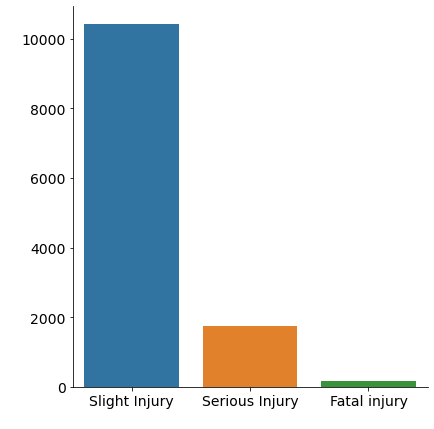

In [16]:
# checking the target
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df["Accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)

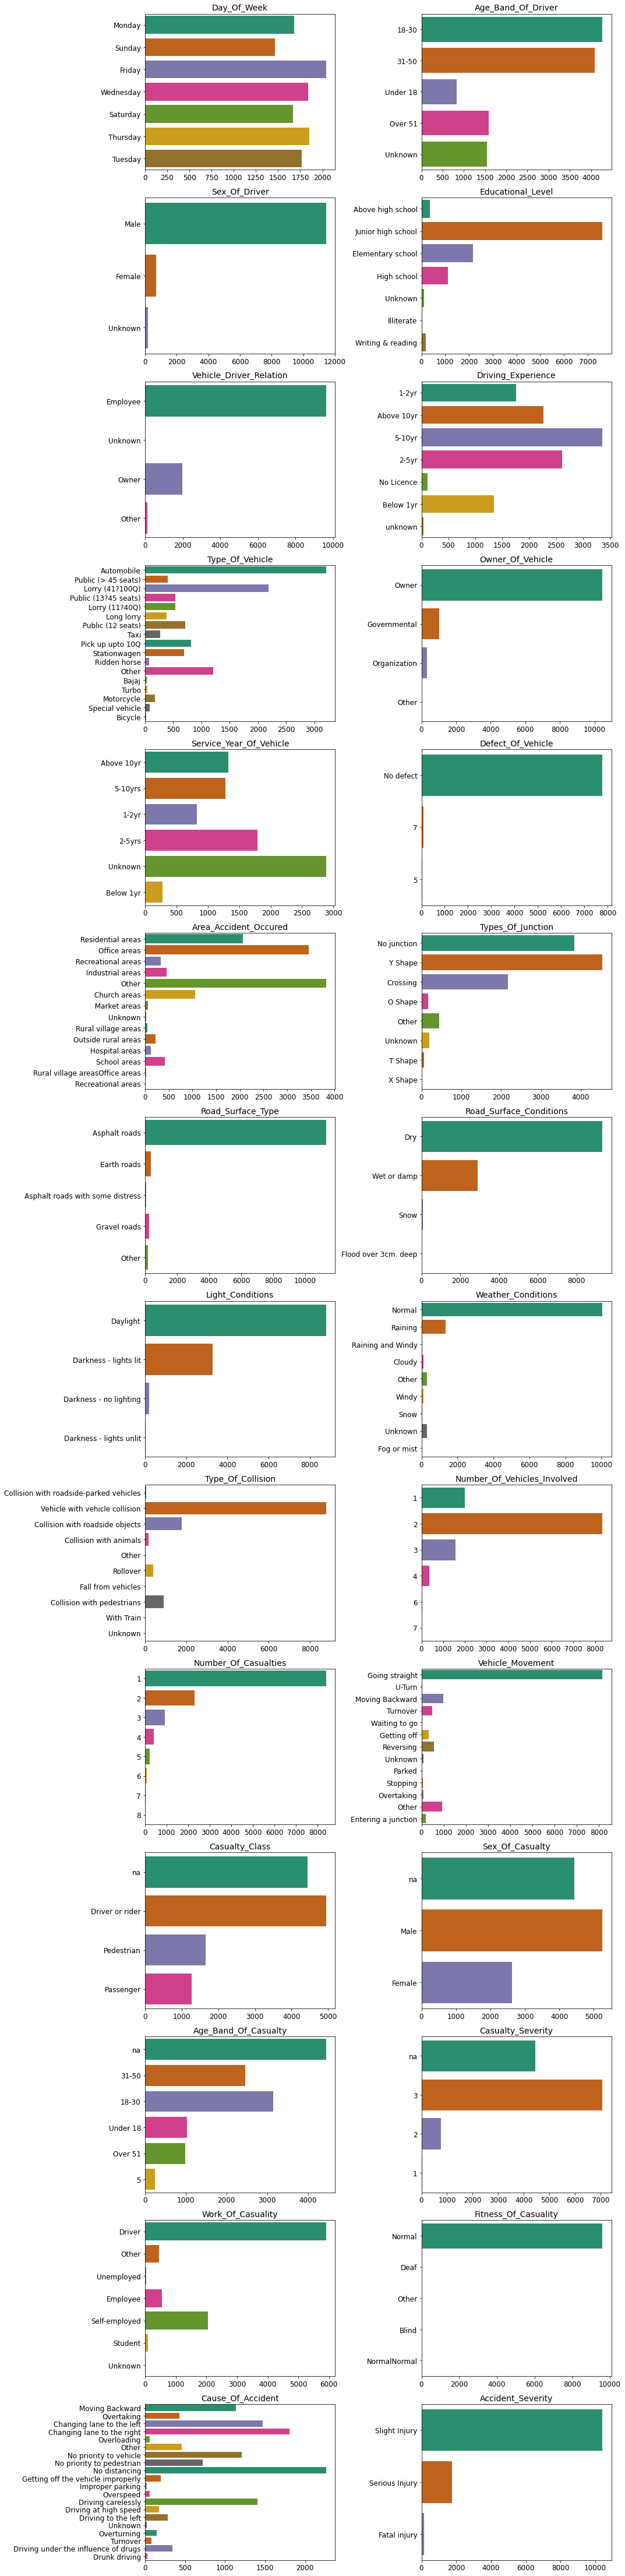

In [17]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in df.drop(['Hour', 'Minute', 'Lanes_or_Medians', 'Road_allignment', 'Pedestrian_movement'], axis=1):
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=df, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

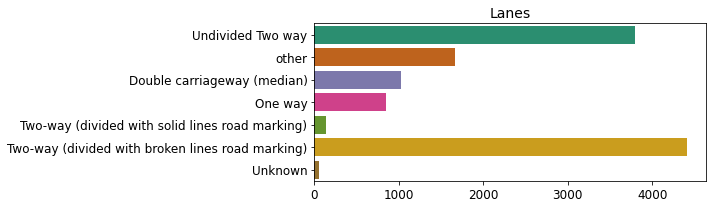

In [18]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='Lanes_or_Medians', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

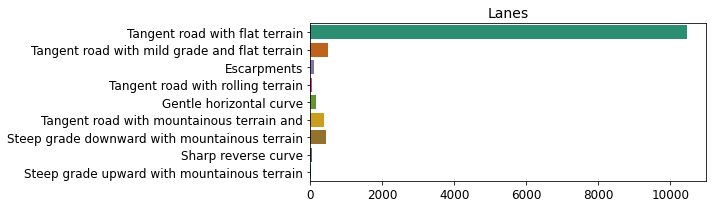

In [19]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='Road_allignment', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

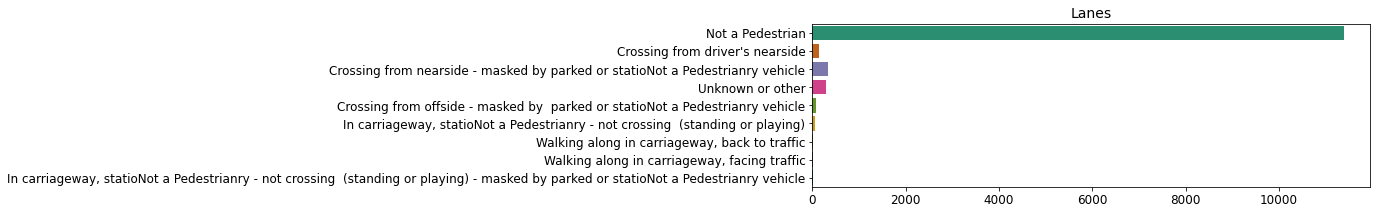

In [20]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='Pedestrian_movement', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

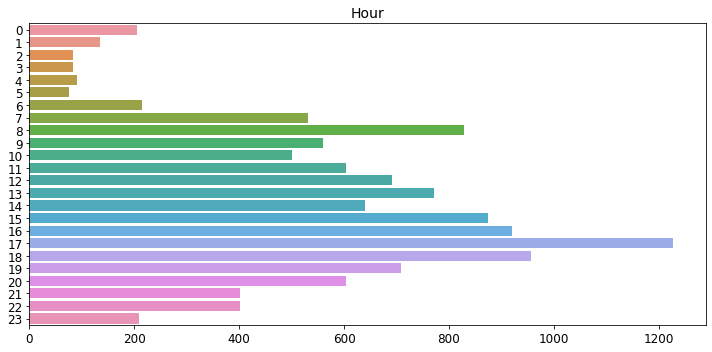

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='Hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

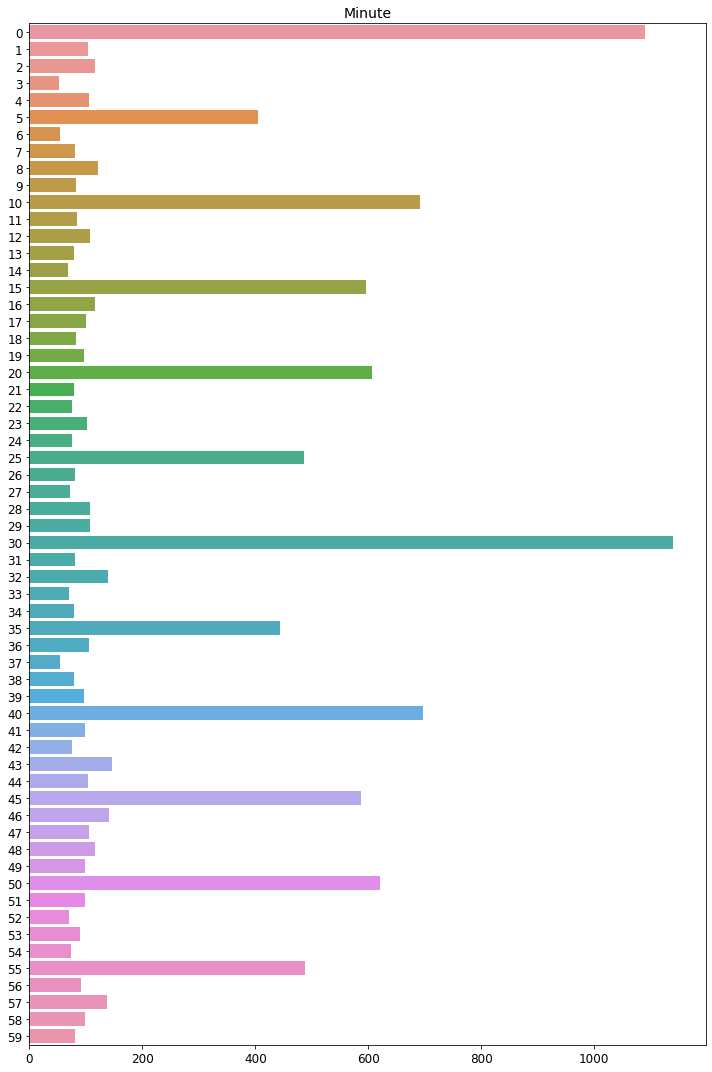

In [22]:
plt.figure(figsize=(10,15))
sns.countplot(data=df, y='Minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

 Key observations in the data are as follows
 
 Most of the accidents involved
 
 * Two vehicles
 * Occured on Fridays
 * Between 3pm to 6pm with maximum numbers at 5 pm
 
 Most of the drivers are
 
     * male and 18-30 yrs age group
     * have only studied upto Junior high school
     * have 5 to 10 years of driving experience
 
 Most of the vehicles involved in accident are
 * Personally Owned Passenger vehicles
 
 Most Accidents happened on
  
 * two-way lanes
 * tangent road with flat terrains
 * Y shaped junctions
 * asphalt roads
 * day time
 * Normal weather conditions
 
 Casualities
 
 * happened to physically fit male drivers
 * are of severity 3
 
 Accident trend is such that
 
 * vehicle to vehicle collision
 * straight movement
 * no pedestrian accidents
 
 Causes are
 
 * Not keeping enough distance

In [23]:
min = list(range(5,56, 5))
def convert_minutes(x: int):
    for m in min:
        if x % m == x and x > m-5:
            return m
        if x in [56,57,58,59]:
            return 0
        if x in min+[0]:
            return x

In [24]:
df['Minute'] = df['Minute'].apply(lambda x: convert_minutes(x))

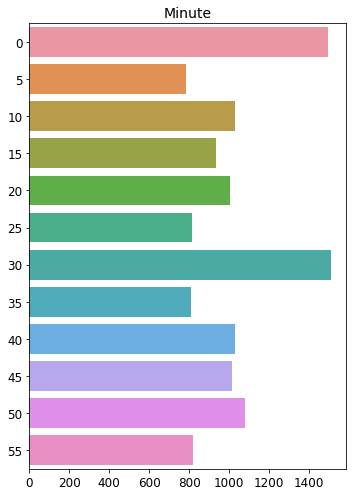

In [25]:
plt.figure(figsize=(5,7))
sns.countplot(data=df, y='Minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [26]:
#Identify numberical and categorical columns

num_cols = df.dtypes[df.dtypes == 'int64'].index.tolist()
cat_cols = df.dtypes[df.dtypes != 'int64'].index.tolist()
df[cat_cols]

Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0          Monday              18-30          Male   Above high school   
1          Monday              31-50          Male  Junior high school   
2          Monday              18-30          Male  Junior high school   
3          Sunday              18-30          Male  Junior high school   
4          Sunday              18-30          Male  Junior high school   
...           ...                ...           ...                 ...   
12311   Wednesday              31-50          Male                 NaN   
12312      Sunday            Unknown          Male   Elementary school   
12313      Sunday            Over 51          Male  Junior high school   
12314      Sunday              18-30        Female  Junior high school   
12315      Sunday              18-30          Male  Junior high school   

      Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                    Employee              1-2yr           Automobile   
1                    Employee         Above 10yr  Public (> 45 seats)   
2                    Employee              1-2yr      Lorry (41?100Q)   
3                    Employee             5-10yr  Public (> 45 seats)   
4                    Employee              2-5yr                  NaN   
...                       ...                ...                  ...   
12311                Employee              2-5yr       Lorry (11?40Q)   
12312                Employee             5-10yr           Automobile   
12313                Employee             5-10yr                Bajaj   
12314                Employee         Above 10yr      Lorry (41?100Q)   
12315                Employee             5-10yr                Other   

      Owner_of_vehicle Service_year_of_vehicle Defect_of_vehicle  ...  \
0                Owner              Above 10yr         No defect  ...   
1                Owner                 5-10yrs         No defect  ...   
2                Owner                     NaN         No defect  ...   
3         Governmental                     NaN         No defect  ...   
4                Owner                 5-10yrs         No defect  ...   
...                ...                     ...               ...  ...   
12311            Owner                     NaN         No defect  ...   
12312            Owner                     NaN         No defect  ...   
12313            Owner                  2-5yrs         No defect  ...   
12314            Owner                  2-5yrs         No defect  ...   
12315            Owner                  2-5yrs         No defect  ...   

      Vehicle_movement   Casualty_class Sex_of_casualty Age_band_of_casualty  \
0       Going straight               na              na                   na   
1       Going straight               na              na                   na   
2       Going straight  Driver or rider            Male                31-50   
3       Going straight       Pedestrian          Female                18-30   
4       Going straight               na              na                   na   
...                ...              ...             ...                  ...   
12311   Going straight               na              na                   na   
12312            Other               na              na                   na   
12313            Other  Driver or rider            Male                31-50   
12314            Other               na              na                   na   
12315         Stopping       Pedestrian          Female                    5   

      Casualty_severity Work_of_casuality Fitness_of_casuality  \
0                    na               NaN                  NaN   
1                    na               NaN                  NaN   
2                     3            Driver                  NaN   
3                     3            Driver               Normal   
4                    na               NaN                  NaN   
...   

# Step 3 : Preprocessing

In [27]:
#Dropping columns that have maximum missing values
df = df.drop(["Service_year_of_vehicle","Defect_of_vehicle","Work_of_casuality","Fitness_of_casuality"],axis=1)

In [28]:
impute_cols = [x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]
print(impute_cols)

['Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Type_of_collision', 'Vehicle_movement']


In [29]:
#Impute the columns with missing values. Strategy to fill the missing values is to use the most frequently occuring values.
impute_cols = [x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]
imputer = SimpleImputer(strategy="most_frequent",missing_values=np.nan)

for col in impute_cols:
    imputer = imputer.fit(df[[col]])
    df[col] = imputer.transform(df[[col]])

In [30]:
#Check if there are any more missing values
df.isna().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
Hour                           0
Minute                         0
dtype: int64

In [31]:
X = df.drop(["Accident_severity"],axis=1)
y = df["Accident_severity"]

In [32]:
#Split data into train and test sets
np.random.seed(42)

#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [34]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

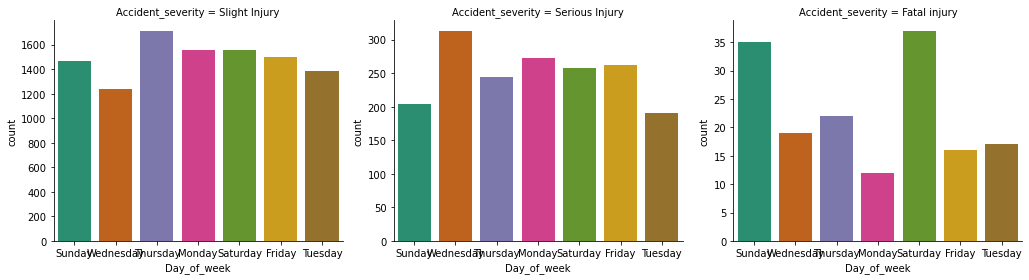

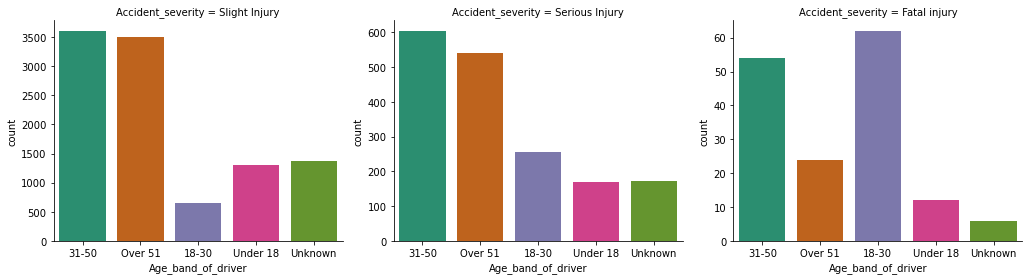

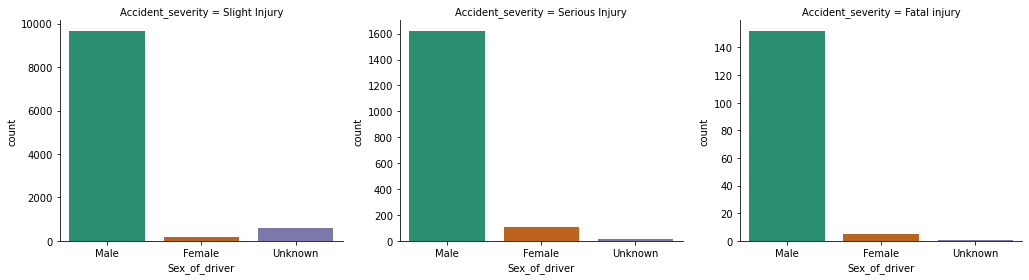

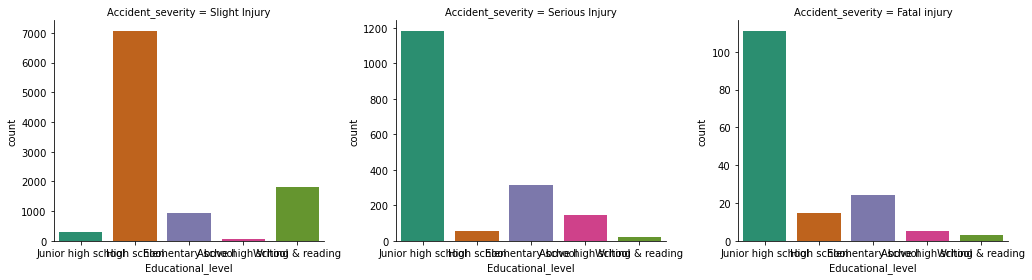

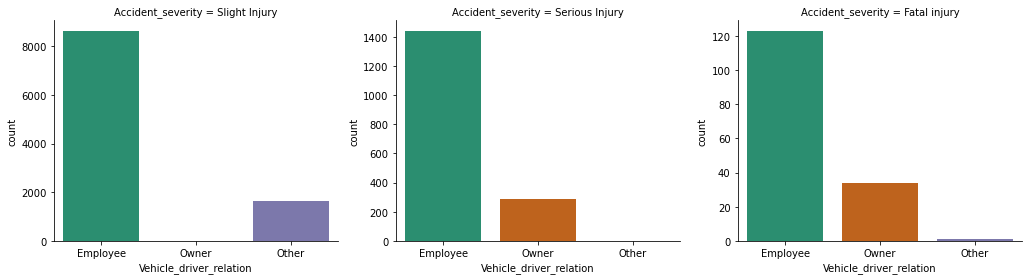

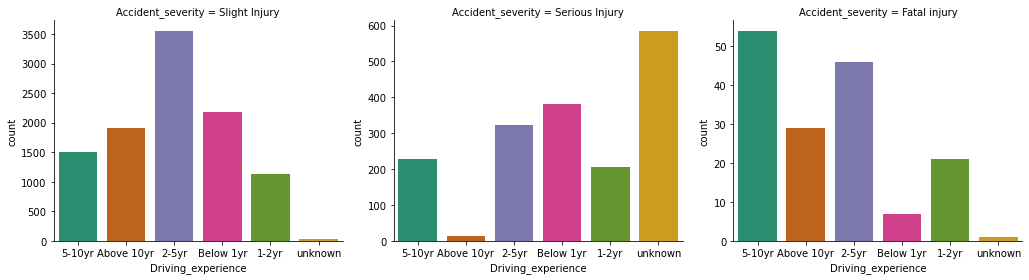

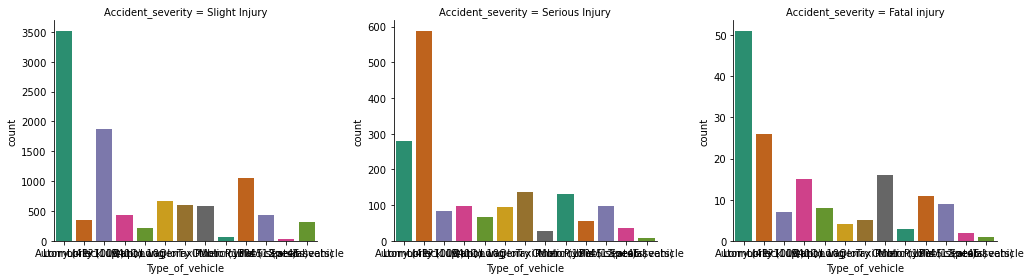

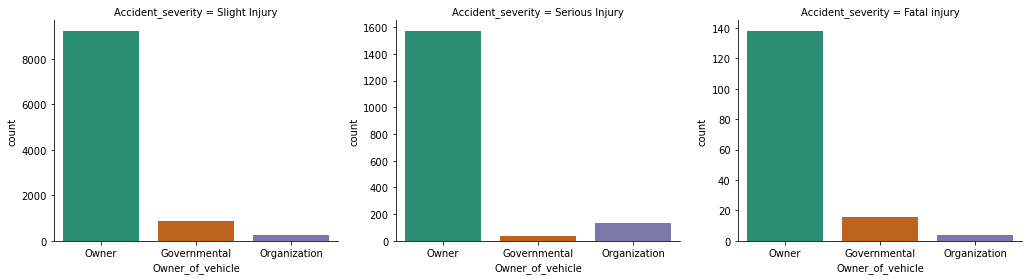

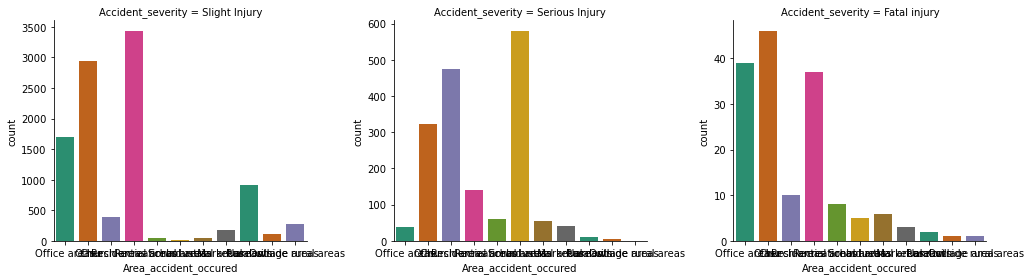

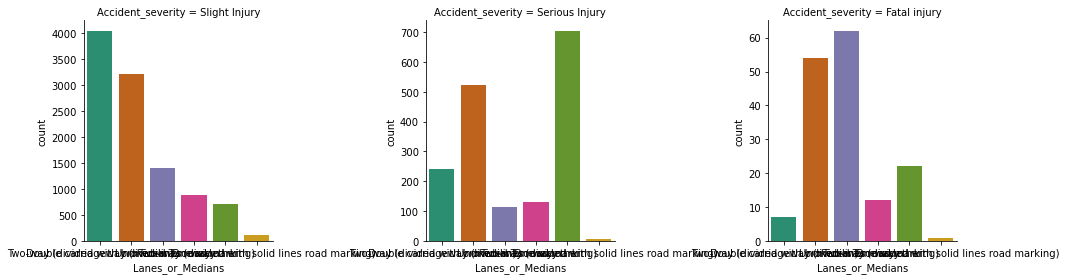

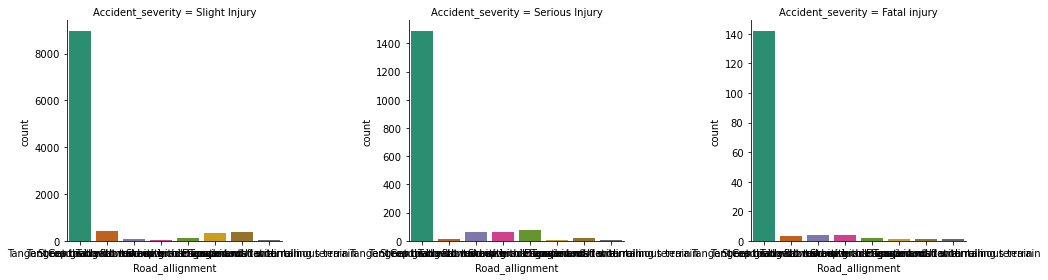

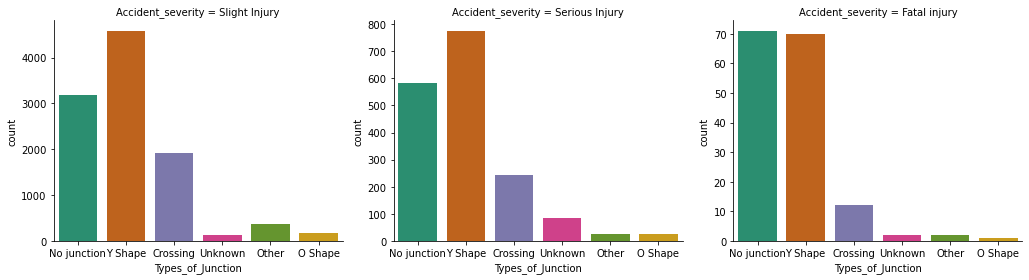

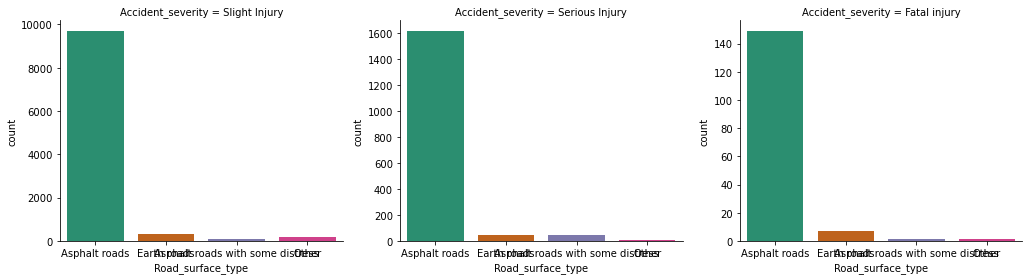

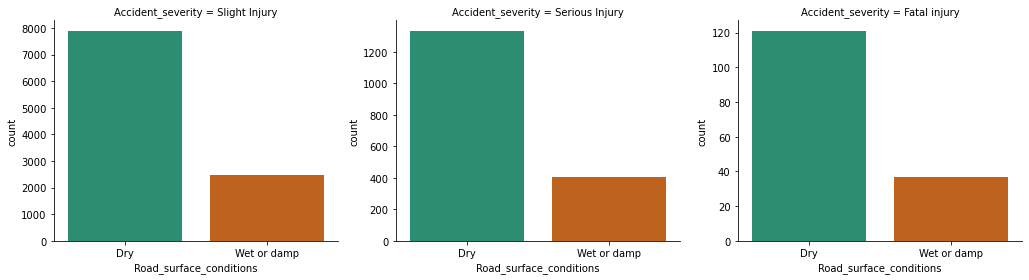

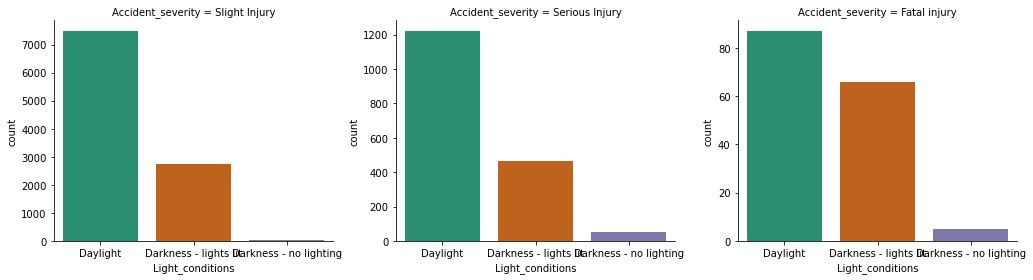

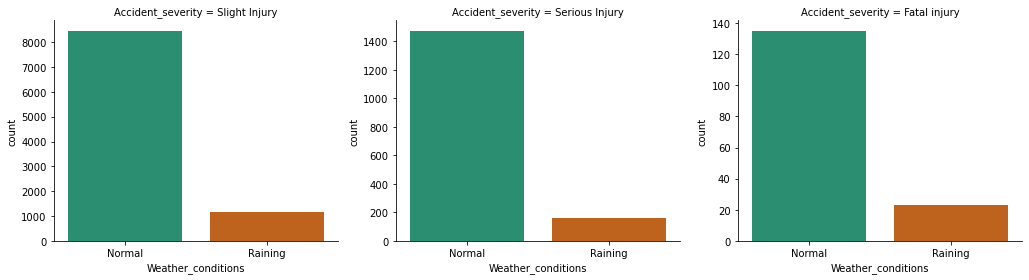

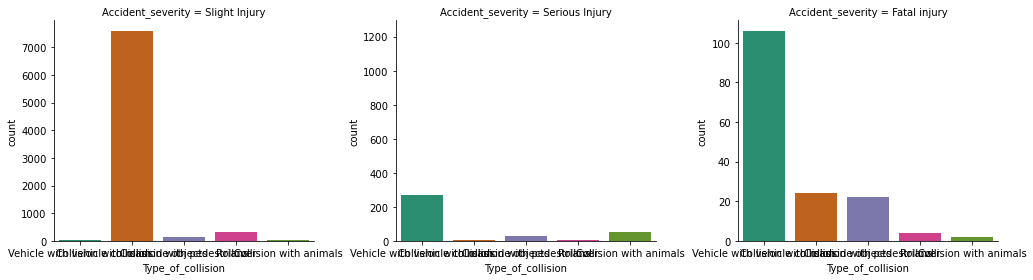

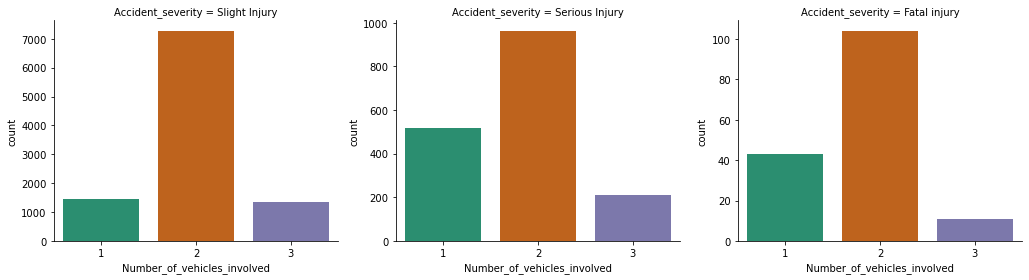

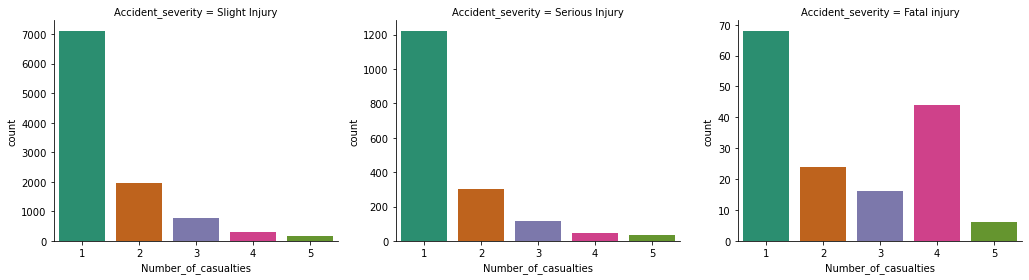

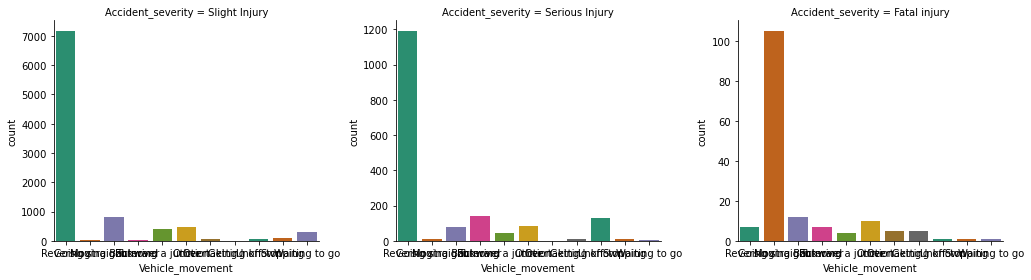

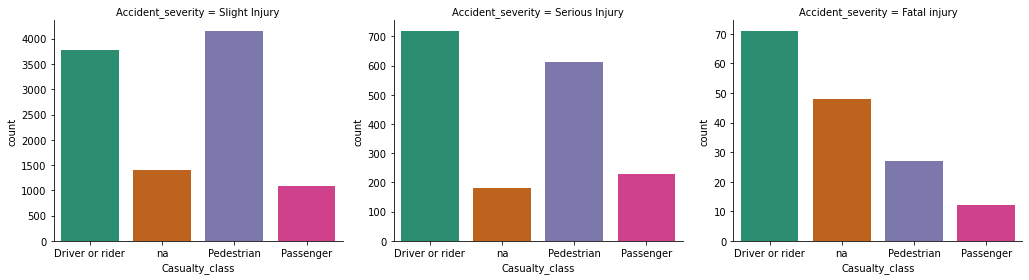

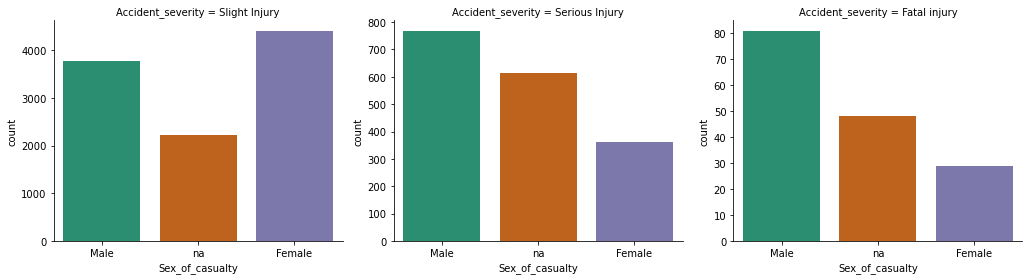

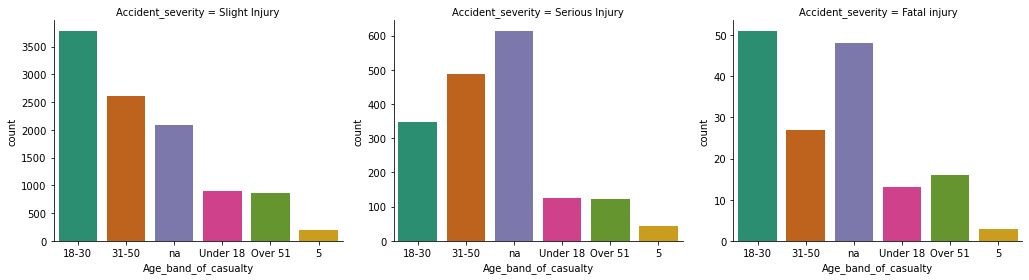

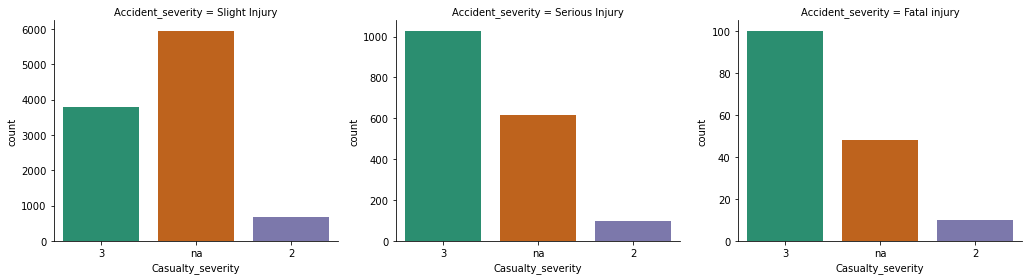

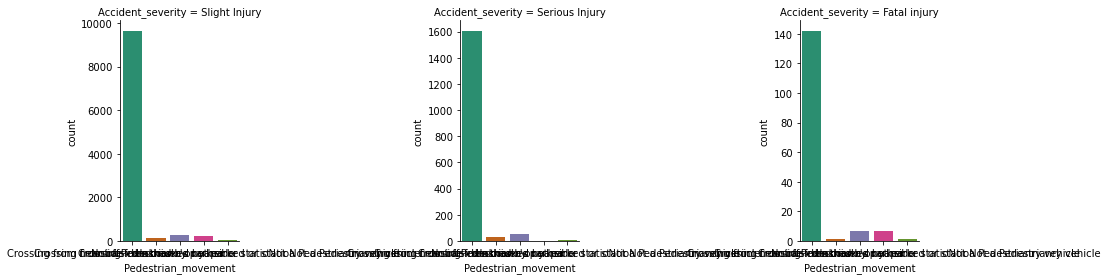

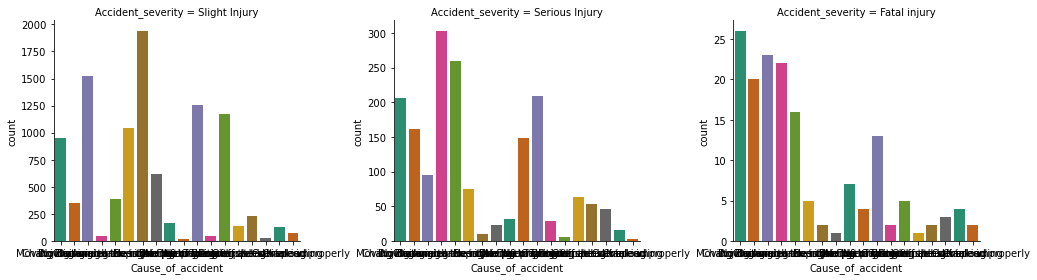

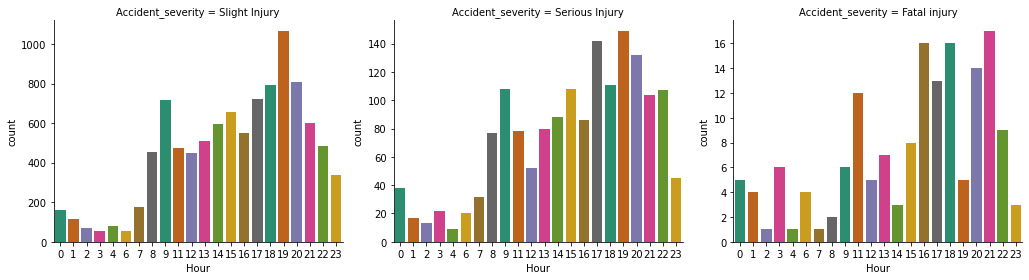

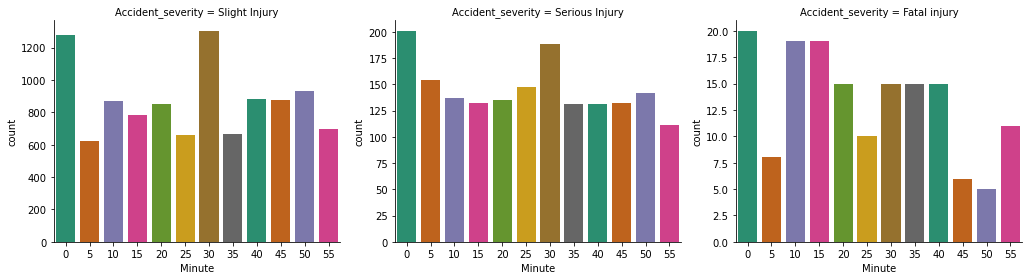

In [35]:
for col in X:
    g = sns.FacetGrid(df, col='Accident_severity', size=4, aspect=1.2, sharey=False)
    g.map(sns.countplot, col, palette = 'Dark2')
    plt.show()

In [36]:
#!pip install imblearn

In [37]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [38]:
# upsampling using smote to have equal distribution of data across all target classes.

counter = Counter(y_train_enc)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train_enc)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train_enc, y_train_enc = oversample.fit_resample(X_train_enc, y_train_enc)

counter = Counter(y_train_enc)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train_enc)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train_enc.shape, y_train_enc.shape)

Class= 2, n=8351 (84.76%)
Class= 1, n=1380 (14.01%)
Class= 0, n=121 (1.23%)
Class= 2, n=8351 (33.33%)
Class= 1, n=8351 (33.33%)
Class= 0, n=8351 (33.33%)
Upsampled data shape:  (25053, 28) (25053,)


In [39]:
np.unique(y_test_enc)

array([0, 1, 2])

# 4. Model

In [40]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn Machine Learning Models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [41]:
model_scores = fit_and_score(models=models,X_train=X_train_enc,X_test=X_test_enc,y_train=y_train_enc,y_test=y_test_enc)
model_scores

{'Logistic Regression': 0.442775974025974,
 'KNN': 0.47483766233766234,
 'Random Forest': 0.8429383116883117}

The above scores are recieved eliminating the upsampling step. We are getting higher scores without upsampling and hence keeping the data with original distribution

### 4.1 Model Comparison

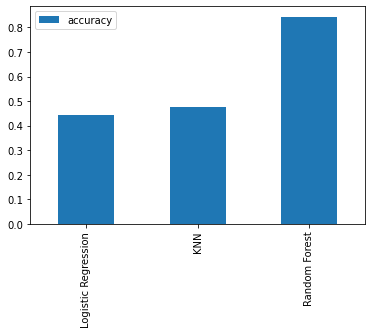

In [42]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [43]:
# Since Random Forest shows good results we will tune the model further to finalize our solution

model_rf = RandomForestClassifier(n_estimators=200)
model_rf.fit(X_train_enc, y_train_enc)
y_pred = model_rf.predict(X_test_enc)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
score = accuracy_score(y_test_enc, y_pred)

In [46]:
score

0.8400974025974026

In [47]:
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 4.1 Hyperparameter Tuning with GridSearchCV

In [48]:
#forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]
#clf = GridSearchCV(model_rf, forest_params, cv = 10, scoring='accuracy')
#clf.fit(X_train_enc, y_train_enc)

In [49]:
#print(clf.best_params_)

#print(clf.best_score_)

#### The following is the result of hyperparameter tuning

Best Parameters : {'max_depth': 14, 'max_features': 5} </br>
Best Score : 0.942575583071686

In [50]:
model_tuned = RandomForestClassifier(n_estimators=200,max_depth=14,max_features=5)
model_tuned.fit(X_train_enc, y_train_enc)


RandomForestClassifier(max_depth=14, max_features=5, n_estimators=200)

# 5. Test Model Performance

In [51]:
y_pred = model_tuned.predict(X_test_enc)

In [52]:
np.unique(y_pred)

array([0, 1, 2])

In [53]:
#!pip install plotly

In [54]:
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [55]:
def model_performance(model, y_test, y_hat) : 
    conf_matrix = confusion_matrix(y_test, y_hat)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)", "2 (pred)"],
                        y = ["0 (true)","1 (true)", "2 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    Accuracy  =  accuracy_score(y_test, y_hat)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
 
     
    #plots
    model = model
    
    #Subplots
    fig = tls.make_subplots(rows=2, cols=1, print_grid=False, 
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        # margin = dict(b = 100)
                        )
    fig.layout.titlefont.size = 14
    
    py.iplot(fig)

In [56]:
model_performance(model_tuned,y_test_enc, y_pred)

D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [57]:
np.unique(y_pred)

array([0, 1, 2])

In [58]:
test = list(y_test_enc)
pos1 = test.index(0)
pos2 = test.index(1)
pos3 = test.index(2)

In [59]:
pos1,pos2,pos3

(9, 2, 0)

In [60]:
#frames = [X_train,y_train]
#df_dummy = pd.concat(frames)

In [61]:
#df_dummy = pd.read_csv("D:/Revi/Programs/Conda/TMLC/Projects/RTA Dataset.csv")

In [62]:
#df_dummy

In [63]:
X_train.iloc[6571]

Day_of_week                                            Friday
Age_band_of_driver                                   Under 18
Sex_of_driver                                            Male
Educational_level                          Junior high school
Vehicle_driver_relation                                 Owner
Driving_experience                                      1-2yr
Type_of_vehicle                                    Automobile
Owner_of_vehicle                                        Owner
Area_accident_occured                            Office areas
Lanes_or_Medians                            Undivided Two way
Road_allignment                Tangent road with flat terrain
Types_of_Junction                                    Crossing
Road_surface_type                               Asphalt roads
Road_surface_conditions                                   Dry
Light_conditions                                     Daylight
Weather_conditions                                     Normal
Type_of_

In [64]:
y_train.value_counts()

Slight Injury     8351
Serious Injury    1380
Fatal injury       121
Name: Accident_severity, dtype: int64

In [65]:

#y_train.index('Fatal Injury')
result = np.where(y_train == 'Fatal injury')
result

(array([  28,  137,  190,  304,  329,  365,  466,  467,  605,  849,  865,
         895,  997, 1099, 1183, 1242, 1317, 1324, 1538, 1568, 1602, 1727,
        1790, 1893, 1951, 2035, 2227, 2235, 2267, 2431, 2530, 2722, 2723,
        2856, 3030, 3054, 3116, 3491, 3533, 3575, 3622, 3772, 3802, 3829,
        3843, 3976, 4007, 4056, 4166, 4189, 4233, 4260, 4522, 4551, 4637,
        4808, 4834, 4836, 4886, 4899, 4962, 5030, 5043, 5094, 5123, 5225,
        5274, 5281, 5293, 5316, 5327, 5610, 5644, 5676, 5711, 5791, 5834,
        5887, 5947, 6011, 6183, 6486, 6707, 6823, 6857, 7201, 7302, 7331,
        7456, 7834, 7896, 7925, 7969, 7976, 7987, 7999, 8010, 8044, 8192,
        8412, 8427, 8705, 8816, 8825, 8840, 8893, 8924, 9023, 9119, 9131,
        9165, 9209, 9238, 9382, 9384, 9471, 9706, 9720, 9751, 9771, 9788],
       dtype=int64),)

In [66]:
X_train.iloc[28]

Day_of_week                                                              Monday
Age_band_of_driver                                                      Over 51
Sex_of_driver                                                              Male
Educational_level                                            Junior high school
Vehicle_driver_relation                                                Employee
Driving_experience                                                   Above 10yr
Type_of_vehicle                                                 Lorry (41?100Q)
Owner_of_vehicle                                                          Owner
Area_accident_occured                                              Office areas
Lanes_or_Medians               Two-way (divided with broken lines road marking)
Road_allignment                                  Tangent road with flat terrain
Types_of_Junction                                                       Y Shape
Road_surface_type                       

In [67]:
print(classification_report(y_test_enc, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.05      0.10        37
           1       0.53      0.04      0.08       363
           2       0.84      0.99      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.59      0.36      0.36      2464
weighted avg       0.79      0.84      0.78      2464



# 6. Explainable AI

In [68]:
#!pip install shap

In [69]:
import shap

In [70]:
shap.initjs()

In [71]:
X_sample_enc = X_train_enc
X_sample_enc

array([[ 4.        ,  4.        ,  1.        , ...,  0.        ,
        17.        ,  4.        ],
       [ 4.        ,  0.        ,  1.        , ..., 12.        ,
        19.        ,  9.        ],
       [ 0.        ,  1.        ,  1.        , ...,  3.        ,
        20.        ,  2.        ],
       ...,
       [ 2.48129682,  2.51870318,  1.        , ...,  1.        ,
        17.51870318,  5.51870318],
       [ 6.        ,  0.07572575,  1.        , ...,  1.15145151,
        15.92427425,  1.30290302],
       [ 1.32664932,  1.32664932,  1.        , ...,  9.        ,
        18.55778356, 11.        ]])

In [72]:
model_tuned.feature_names = list(X.columns.values)

In [73]:
# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(model_tuned)

In [74]:
#6571 is slight injury
#7495 is Serious Injury
#28 is fatal Injury

In [75]:
# Calculate Shap values for class 2 - Fatal Injury
choosen_instance = X_sample_enc[0]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [76]:
# Calculate Shap values for class 1 - Severe Injury
choosen_instance = X_sample_enc[117]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [77]:
# Calculate Shap values for class 0 - Slight Injury
choosen_instance = X_sample_enc[393]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

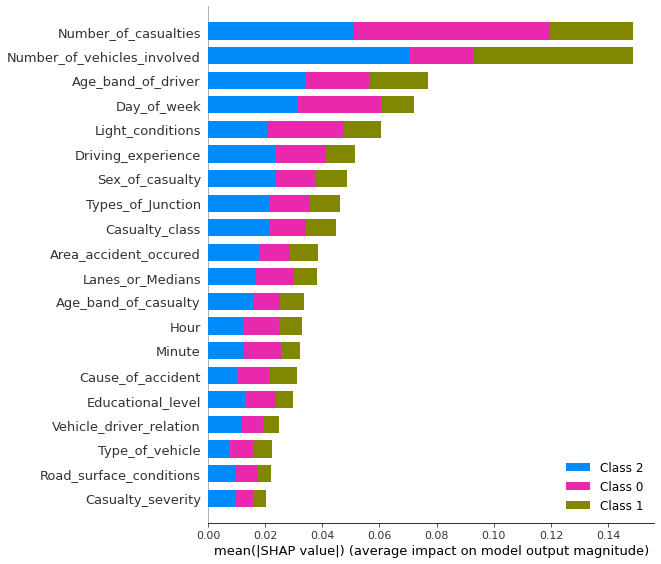

In [78]:
choosen_instance = X_sample_enc[0:100,:]
shap_values = explainer.shap_values(choosen_instance)

shap.summary_plot(shap_values, X_train_enc,feature_names=model_tuned.feature_names)

In [79]:
df['Casualty_class'].value_counts()

Driver or rider    4944
na                 4443
Pedestrian         1649
Passenger          1280
Name: Casualty_class, dtype: int64

# Saving the Model

In [80]:
import joblib

In [81]:
with open('rf_tuned_final.joblib', 'wb') as f:
    joblib.dump(model_tuned, f, compress=1)

# Light Weight Model for deployment

In [82]:
model_tuned.feature_names

['Day_of_week',
 'Age_band_of_driver',
 'Sex_of_driver',
 'Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Number_of_vehicles_involved',
 'Number_of_casualties',
 'Vehicle_movement',
 'Casualty_class',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Casualty_severity',
 'Pedestrian_movement',
 'Cause_of_accident',
 'Hour',
 'Minute']

In [83]:
# Creating a light Weight model with only prominent parameters to deploy for prediction
# getting Top 10 feature importance
top10 = ['Number_of_vehicles_involved','Number_of_casualties','Age_band_of_driver','Day_of_week','Light_conditions','Driving_experience','Types_of_Junction','Sex_of_casualty','Casualty_class','Area_accident_occured','Lanes_or_Medians']

In [84]:
df_top10['Lanes_or_Medians'].value_counts()

NameError: name 'df_top10' is not defined

In [ ]:
df_top10 = df[top10]
df_top10

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_top10, y, test_size=0.3, random_state=42)
print(X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape)

In [ ]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train_new, X_test_new)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train_new, y_test_new)

In [ ]:
model_light = RandomForestClassifier(n_estimators=200,max_depth=14,max_features=5)
model_light.fit(X_train_enc, y_train_enc)
y_pred_tuned = model_light.predict(X_test_enc)

In [ ]:
np.unique(y_pred_tuned)

In [ ]:
print(classification_report(y_test_enc, y_pred_tuned))

# Save the revised Model

In [ ]:
with open('rf_deploy.joblib', 'wb') as f:
    joblib.dump(model_light, f, compress=1)

In [ ]:
# predicting
y_pred_new = model_light.predict(X_test_enc)
score_new = accuracy_score(y_test_enc, y_pred_new)
print("Accuracy: ", score_new)

In [ ]:
y_pred_new

In [ ]:
np.unique(y_pred_new)

In [ ]:
test = list(y_pred_new)

In [ ]:
pos3 = test.index(2)
pos2 = test.index(1)


In [ ]:
pos3,pos2

In [ ]:
X_test_enc[12]

In [ ]:
X_test_enc

In [ ]:
X_test_new.iloc[12]

In [ ]:
data=np.array([0., 2., 4., 3., 0., 1., 1., 1., 0., 9., 2.]).reshape(1,-1)

In [ ]:
result = model_light.predict(data)
result

In [ ]:
if result == 0:
    result = "Slight Injury"
elif result == 1:
    result = "Serious Injury"
else:
    result = "Fatal Injury"
print(result)